In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BM=pd.read_csv('E:\SaiVenkat\wbcd.csv')
BM

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


# imported libraries and loaded dataset

# here the features are all except diagnosis field
#label is diagnosis and it is of categorical so we will go for classification algorithm.

In [3]:
BM.drop('id',axis=1,inplace=True)

In [4]:
BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [5]:
BM.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# separating two label data rows

In [6]:
B_data=BM[(BM['diagnosis']!='M')]

In [7]:
B_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,...,15.40,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464
563,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.17910,0.11550,0.2382,0.08553
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488


In [8]:
M_data=BM[(BM['diagnosis']=='M')]

In [9]:
M_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
7,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.10860
10,M,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.2113,0.2480,0.08999
14,M,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,...,21.44,30.96,139.80,1421.0,0.1528,0.1845,0.3977,0.1466,0.2293,0.06091
18,M,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,...,23.68,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.1923,0.3294,0.09469
25,M,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,...,16.57,20.86,110.30,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.10300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
555,M,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.23,28.74,172.00,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
560,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.1447,0.3591,0.10140
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.3630,0.1226,0.3175,0.09772


In [10]:
BM['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

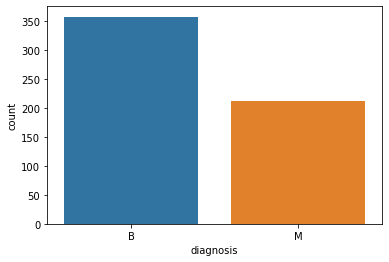

In [11]:
sns.countplot(x='diagnosis',data=BM)

# Visualisation part

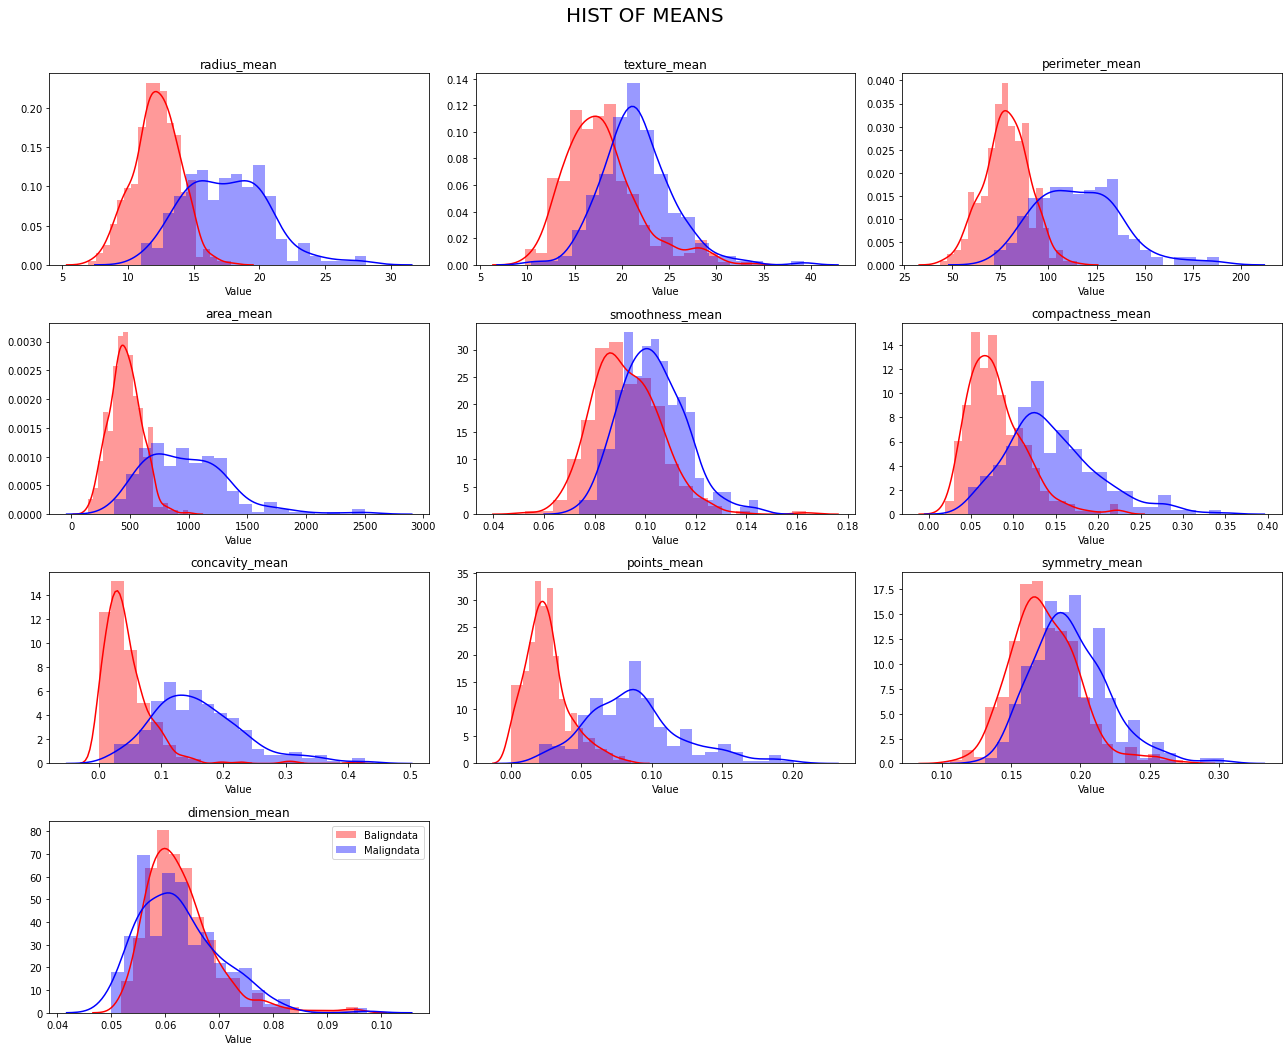

In [12]:
fig=plt.figure(figsize=(18,14),tight_layout=True)
for i,b in enumerate(list(BM.columns[1:11])):
    i+=1
    ax=fig.add_subplot(4,3,i)
    sns.distplot(B_data[b],label="Baligndata",bins=20,color='r',hist=True,kde=True)
    sns.distplot(M_data[b],label="Maligndata",bins=20,color='b',hist=True,kde=True)
    ax.set_title(b)
    ax.set_xlabel('Value')
plt.suptitle('HIST OF MEANS',y=1.04,size=20)
plt.tight_layout()
plt.legend()
plt.show()

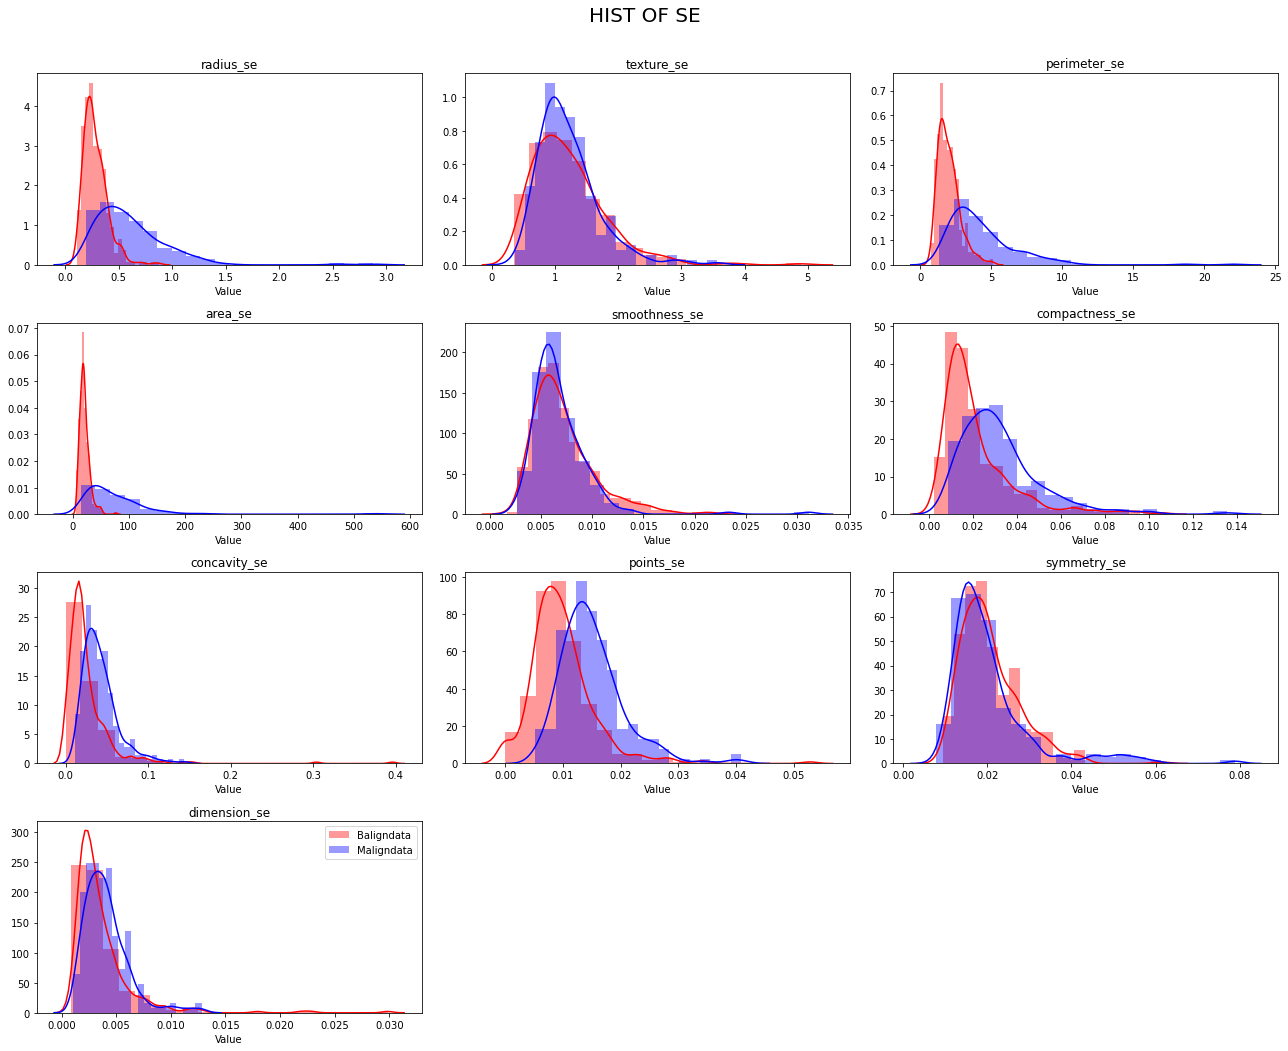

In [13]:
fig=plt.figure(figsize=(18,14),tight_layout=True)
for i,b in enumerate(list(BM.columns[11:21])):
    i+=1
    ax=fig.add_subplot(4,3,i)
    sns.distplot(B_data[b],label="Baligndata",bins=20,color='r',hist=True,kde=True)
    sns.distplot(M_data[b],label="Maligndata",bins=20,color='b',hist=True,kde=True)
    ax.set_title(b)
    ax.set_xlabel('Value')
plt.suptitle('HIST OF SE',y=1.04,size=20)
plt.tight_layout()
plt.legend()
plt.show()

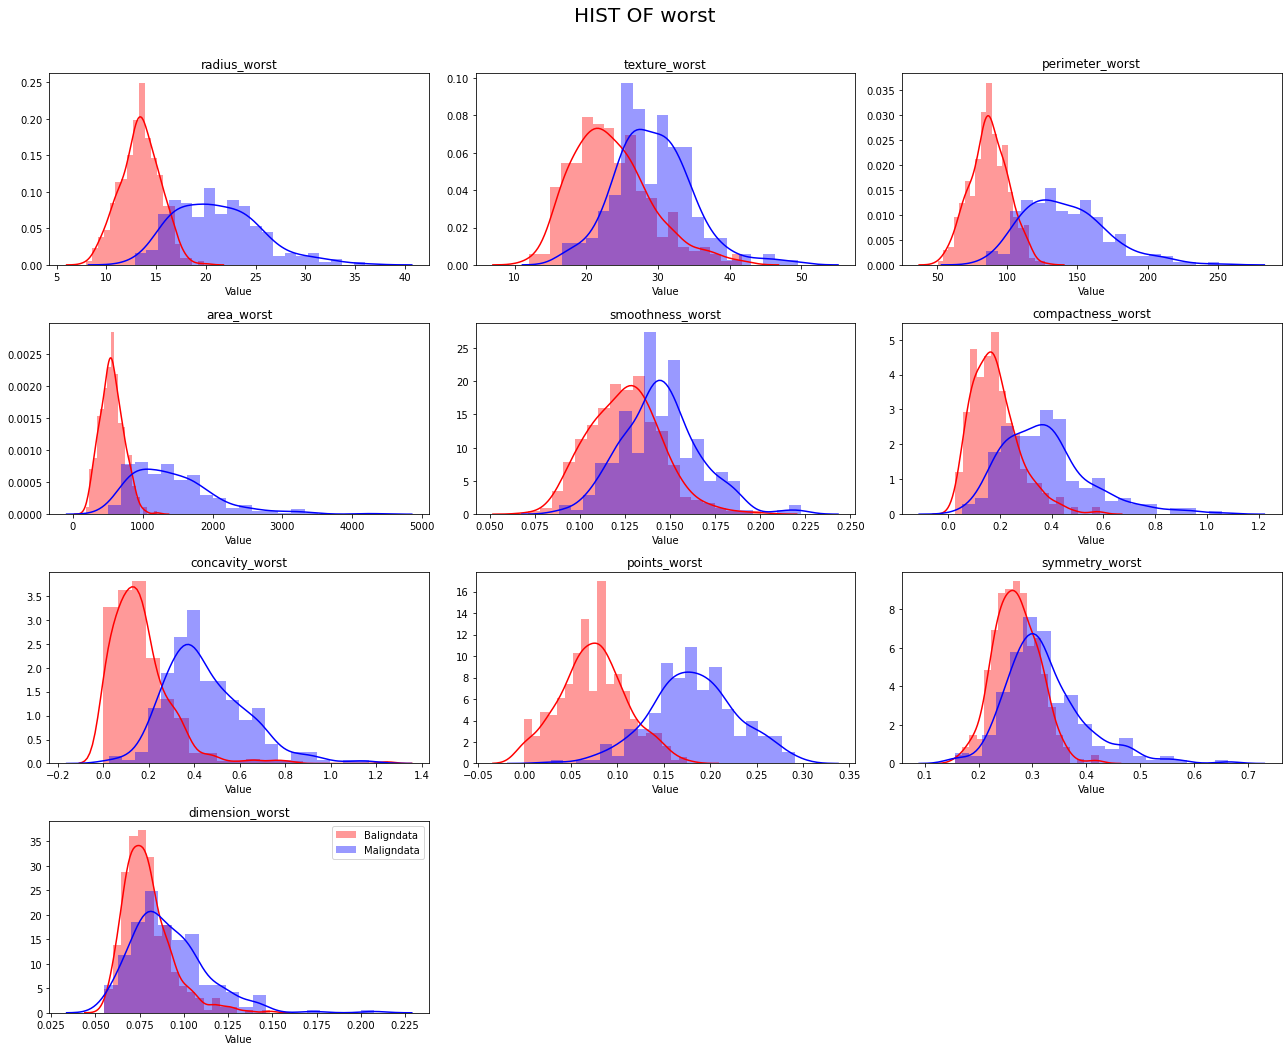

In [14]:
fig=plt.figure(figsize=(18,14),tight_layout=True)
for i,b in enumerate(list(BM.columns[21:31])):
    i+=1
    ax=fig.add_subplot(4,3,i)
    sns.distplot(B_data[b],label="Baligndata",bins=20,color='r',hist=True,kde=True)
    sns.distplot(M_data[b],label="Maligndata",bins=20,color='b',hist=True,kde=True)
    ax.set_title(b)
    ax.set_xlabel('Value')
plt.suptitle('HIST OF worst',y=1.04,size=20)
plt.tight_layout()
plt.legend()
plt.show()

# Separating features and labels

In [15]:
f=BM.iloc[:,1:]
f

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [16]:
l=BM.iloc[:,0]
l

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

# Scaling input data

In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_stand=scalar.fit_transform(f)
x_stand

array([[-0.51329651, -1.60559452, -0.54037561, ..., -0.31513306,
        -0.11932056, -0.89972108],
       [-1.00180093, -0.07903849, -0.93456583, ..., -0.53820271,
         0.06348865, -0.44752801],
       [-0.87683468, -0.57237672, -0.8670139 , ..., -0.61357437,
         0.15731992, -0.28460551],
       ...,
       [ 0.32738551,  0.72612674,  0.28631171, ...,  0.12171802,
         0.44366709,  0.7633076 ],
       [ 0.11437486, -1.23559085,  0.07788929, ..., -0.11733956,
        -0.47685008, -0.32395074],
       [ 2.05703196, -0.97495933,  2.03195239, ...,  1.24848623,
        -0.27624528,  0.15040866]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_stand,l,test_size=0.2,random_state=66)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
pred=knn.predict(x_train)
pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [21]:
pred1=knn.predict(x_test)
pred1

array(['M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B'], dtype=object)

# Predicted values now finding out confusion mat, accuracy score and classification report of both trained and tested data

In [22]:
print("\n confustion matrix of n neighbours on training dataset:\n\n",pd.crosstab(y_train,pred,rownames=['Actual'],colnames=['Predict']))


 confustion matrix of n neighbours on training dataset:

 Predict    B    M
Actual           
B        285    1
M         10  159


In [23]:
from sklearn.metrics import accuracy_score,classification_report

In [24]:
print("\n Accuracy score on training dataset:",round(accuracy_score(y_train,pred),3))


 Accuracy score on training dataset: 0.976


In [25]:
print("\n classification report on training dataset\n\n:",classification_report(y_train,pred))


 classification report on training dataset

:               precision    recall  f1-score   support

           B       0.97      1.00      0.98       286
           M       0.99      0.94      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [26]:
print("\n confustion matrix of n neighbours on testing dataset:\n\n",pd.crosstab(y_test,pred1,rownames=['Actual'],colnames=['Predict']))


 confustion matrix of n neighbours on testing dataset:

 Predict   B   M
Actual         
B        71   0
M         3  40


In [27]:
print("\n Accuracy score on testing dataset:",round(accuracy_score(y_test,pred1),3))


 Accuracy score on testing dataset: 0.974


In [28]:
print("\n classification report on testing dataset\n\n:",classification_report(y_train,pred))


 classification report on testing dataset

:               precision    recall  f1-score   support

           B       0.97      1.00      0.98       286
           M       0.99      0.94      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



# till now i took k-neghbours =3 but now i'm taking the values of k in a range and checking accuracy b/wn training and test dataset

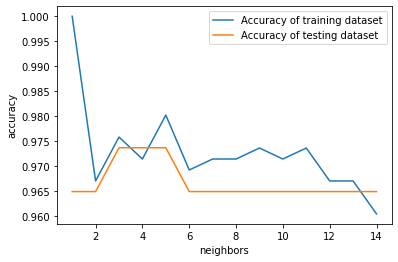

In [29]:
training_accuracy=[]
testing_accuracy=[]
neighborss=range(1,15)
for neighbors in neighborss:
    knn=KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(accuracy_score(y_train,knn.predict(x_train)))
    testing_accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
plt.plot(neighborss,training_accuracy,label='Accuracy of training dataset')
plt.plot(neighborss,testing_accuracy,label='Accuracy of testing dataset')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
BM.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

# here after performing svm() with the help svm method

In [31]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [32]:
model.predict(x_train)

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [33]:
print("\n\nconfusion matrix for training dataset:\n\n",pd.crosstab(y_train,model.predict(x_train),rownames=['Actual'],colnames=['Prediction']))



confusion matrix for training dataset:

 Prediction    B    M
Actual              
B           286    0
M             7  162


In [34]:
print("\n accuracy score of training dataset:",accuracy_score(y_train,model.predict(x_train),3))


 accuracy score of training dataset: 0.9846153846153847


C:\Users\saivenkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [35]:
print("\n\n Classification report:\n\n",classification_report(y_train,model.predict(x_train)))



 Classification report:

               precision    recall  f1-score   support

           B       0.98      1.00      0.99       286
           M       1.00      0.96      0.98       169

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [36]:
print("\n\nconfusion matrix for testing dataset:\n\n",pd.crosstab(y_test,model.predict(x_test),rownames=['Actual'],colnames=['Prediction']))



confusion matrix for testing dataset:

 Prediction   B   M
Actual            
B           70   1
M            0  43


In [37]:
print("\n accuracy score of testing dataset:",accuracy_score(y_test,model.predict(x_test),3))


 accuracy score of testing dataset: 0.9912280701754386


C:\Users\saivenkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [38]:
print("\n\n Classification report:\n\n",classification_report(y_test,model.predict(x_test)))



 Classification report:

               precision    recall  f1-score   support

           B       1.00      0.99      0.99        71
           M       0.98      1.00      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# soft margin parameters c gamma kernel

# Gridsearch cross validation

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
params_grid={'C':[0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':('linear','rbf')}

In [41]:
grid=GridSearchCV(SVC(),params_grid,refit=True,verbose=3)

In [42]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.989, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.989, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.978, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.956, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.967, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.978, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.967, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.945, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.978, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.714, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.956, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.956, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.967, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.923, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.890, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.956, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.956, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.923, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.890, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=0.967, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [43]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [44]:
grid.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [45]:
print("\n\nconfusion matrix for training dataset:\n\n",pd.crosstab(y_train,grid.predict(x_train),rownames=['Actual'],colnames=['Prediction']))



confusion matrix for training dataset:

 Prediction    B    M
Actual              
B           285    1
M             6  163


In [46]:
print("\n accuracy score of training dataset:",accuracy_score(y_train,grid.predict(x_train),3))


 accuracy score of training dataset: 0.9846153846153847


C:\Users\saivenkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [47]:
print("\n\n Classification report:\n\n",classification_report(y_train,grid.predict(x_train)))



 Classification report:

               precision    recall  f1-score   support

           B       0.98      1.00      0.99       286
           M       0.99      0.96      0.98       169

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [48]:
print("\n\nconfusion matrix for testing dataset:\n\n",pd.crosstab(y_test,grid.predict(x_test),rownames=['Actual'],colnames=['Prediction']))



confusion matrix for testing dataset:

 Prediction   B   M
Actual            
B           70   1
M            1  42


In [49]:
print("\n accuracy score of testing dataset:",accuracy_score(y_test,grid.predict(x_test),3))


 accuracy score of testing dataset: 0.9824561403508771


C:\Users\saivenkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [50]:
print("\n\n Classification report:\n\n",classification_report(y_test,grid.predict(x_test)))



 Classification report:

               precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# deploying the model

# Pickle ---> Convert memory object into a file

In [58]:
import pickle
pickle.dump(grid,open('svm & knn practice.model','wb'))